## Исследование данных по рынку видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 1. Откройте файл с данными и изучите общую информацию

In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from scipy import stats as st
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
data.info()
data.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
172,Dr. Mario,GB,1989.00,Puzzle,2.18,0.96,2.00,0.20,NaN,NaN,NaN
4196,Final Fantasy Crystal Chronicles: Echoes of Time,DS,2009.00,Role-Playing,0.12,0.06,0.27,0.02,75.00,7.3,E10+
14434,The Legend of Heroes III: Song of the Ocean,PSP,2006.00,Role-Playing,0.03,0.00,0.00,0.00,58.00,6.1,E10+
5456,WWE Wrestlemania XIX,GC,2003.00,Fighting,0.26,0.07,0.00,0.01,76.00,8.7,T
2948,MX vs. ATV Unleashed: On the Edge,PSP,2006.00,Racing,0.64,0.00,0.00,0.05,68.00,8.1,E
9244,Daytona USA Championship Circuit Edition,SAT,1995.00,Racing,0.00,0.00,0.14,0.00,NaN,NaN,NaN
1736,Army of Two,PS3,2008.00,Shooter,0.74,0.26,0.02,0.15,74.00,7.3,M
8062,Corpse Party: Blood Drive,PSV,2014.00,Adventure,0.08,0.01,0.06,0.03,60.00,7.4,M
10800,Castlevania Double Pack,GBA,2006.00,Platform,0.07,0.03,0.00,0.00,86.00,8.4,T
11855,Harlem Globetrotters: World Tour,DS,2006.00,Sports,0.07,0.00,0.00,0.01,NaN,tbd,E


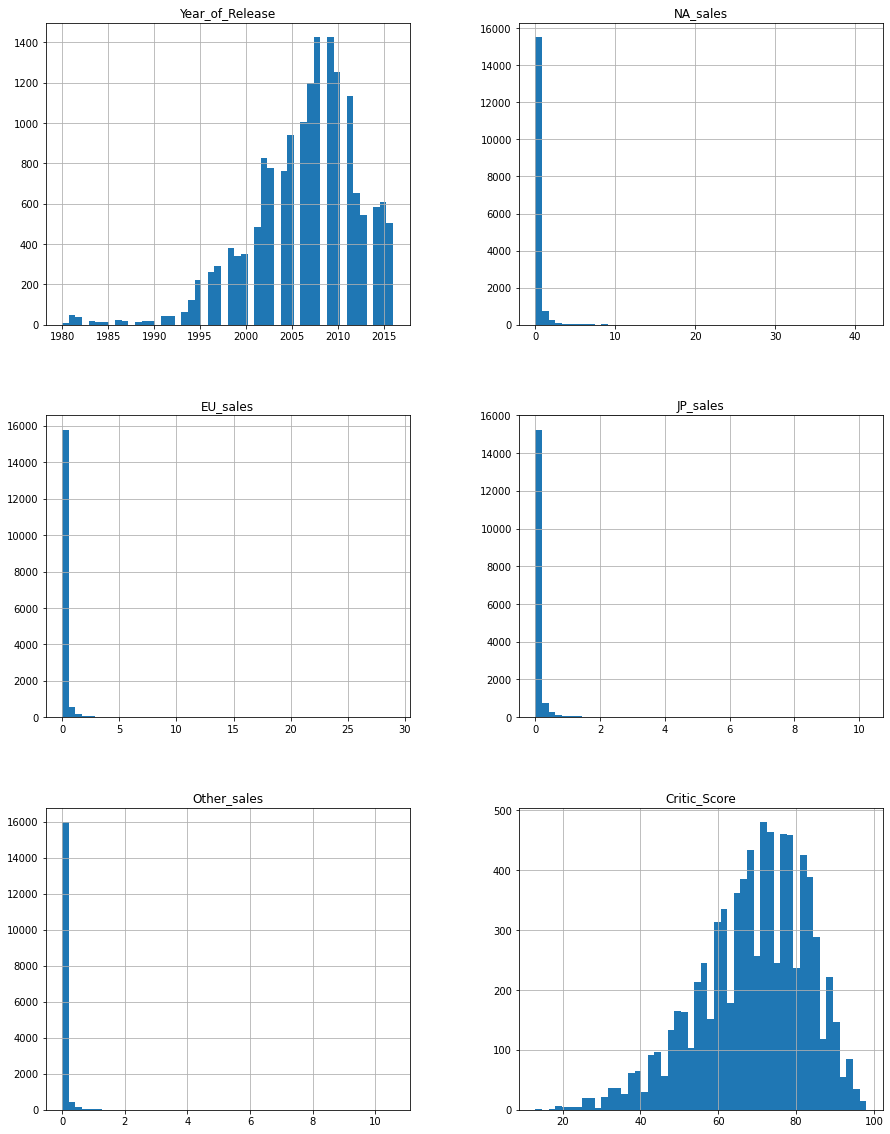

In [4]:
data.hist(bins=50, figsize=(15,20))
plt.show()

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.duplicated().sum()

0

Видим, что проблем не так уж много, но они есть. Пропуски в довольно важных категориях, зато явных дубликатов нет.

Столбцы можно будет тоже поправить немного.

### 2. Подготовим данные

- Заменим названия столбцов (приведите к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [10]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
data.query('user_score.isna() and critic_score.isna() and rating.isna()').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6621 entries, 1 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6619 non-null   object 
 1   platform         6621 non-null   object 
 2   year_of_release  6536 non-null   float64
 3   genre            6619 non-null   object 
 4   na_sales         6621 non-null   float64
 5   eu_sales         6621 non-null   float64
 6   jp_sales         6621 non-null   float64
 7   other_sales      6621 non-null   float64
 8   critic_score     0 non-null      float64
 9   user_score       0 non-null      object 
 10  rating           0 non-null      object 
dtypes: float64(6), object(5)
memory usage: 620.7+ KB


In [12]:
data.query('user_score.isna() and critic_score.isna() and rating.isna()').sample(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5394,Bank Heist,2600,1982.00,Action,0.32,0.02,0.00,0.00,NaN,NaN,NaN
12123,Judie no Atelier: Guramnat no Renkinjutsushi,PS2,2002.00,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
15919,Oshiri Kajiri Mushi no Rhythm Lesson DS: Kawai...,DS,2008.00,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15655,Super Dodge Ball,NG,1995.00,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9976,Sengoku Cyber: Fujimaru Jigokuhen,PS,1995.00,Strategy,0.00,0.00,0.11,0.01,NaN,NaN,NaN
12322,Super Mahjong 2: Honkaku 4Jin Uchi,SNES,1993.00,Misc,0.00,0.00,0.06,0.00,NaN,NaN,NaN
10906,MegaTagmension Blanc + Neptune VS Zombies,PSV,2015.00,Action,0.02,0.01,0.05,0.01,NaN,NaN,NaN
16164,SeaWorld Adventure Parks: Shamu's Deep Sea Adv...,XB,2005.00,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN
11798,My First Songs,Wii,2010.00,Misc,0.00,0.06,0.00,0.01,NaN,NaN,NaN
14572,Hudson x GReeeeN Live!? DeeeeS!?,DS,2010.00,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в `critic_score` и `user_score` сложно объяснить. Я не знаю откуда была выгружена информация, возможно возникли проблемы при выгрузке.

Интересно заметить оценки отсутствуют почти везде где отсутствует `rating`. Судя по тому, что выборка выдала мне почти все японские платформы, предположу, что рейтинга здесь нет из-за того, что ESRB - это сугубо американская система. У Европы своя программа (PEGI), а у Японии - своя (CERO). Вплоне логично, что у японской продукции нет рейтинга ESRB.

Возможно отсутствие оценок связано с отсутсвием рейтинга. Было бы понятно точно, если бы я знал с какой платформы были выгруженны данные по рейтингу и оценкам.

Заполнить такие данные тоже не представляется возможным.

Что касается `year_of_release` - данные довольно важные, скорее всего ошибка при выгрузке. Но так как здесь очень малый процент пропусков - их можно игнорировать.

`name` и `genre` можно будет просто удалить как аномальные значения (к тому же исследование покажет, что там и вовсе остутствует половина данных)


Чтобы преобразовать данные в нужные, нужно сначала разобраться с пропусками. Исходя из поставленных задач - сменой типов данных займемся в последнюю очередь.

Как я уже писал выше - заполнить пропуски корректным способом невозможно. Поэтому просто поставим заглушки, чтобы потом эти данные не мешали нам в дальнейших действиях.

In [13]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [14]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Сразу разберемся с 'tbd' из столбца `user_score`. TBD означает To-Be-Determined. Такое обозначение возможно, когда данных слишком мало (в данном случае оценок) для выявления достовреной средней величины. В нашем случае такие данные для нас бесполезны и равносильны NaN, поэтому заменим эти значения так же, как и пропуски.

Сразу обращу внимание на колонку `rating`, в частности на рейтинг под названием `K-A`. Это устаревшая форма `E` рейтинга. ESRB изначально хотели использовать `E`, но были проблемы с лицензией. Тоже сразу приведём всё в порядок.

In [15]:
data['user_score'] = data['user_score'].replace('tbd', -1, regex=True)
data['rating'] = data['rating'].replace('K-A', 'E', regex=True)

Как я уже писал выше - заполнить пропуски корректным способом невозможно. Поэтому просто поставим заглушки, чтобы потом эти данные не мешали нам в дальнейших действиях. 

Заодно удалим пару строчек, где остутствует половина данных. Их можно было бы использовать в исследовательском анализе, но под вопросом стоит достоверность таких данных.

In [16]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
data = data.drop(index=[659, 14244])

In [18]:
data['year_of_release'] = data['year_of_release'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('none')

In [19]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [20]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
 11  sales_total      16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


Поменяем типы данных где нужно

In [22]:
data['year_of_release'] = data['year_of_release'].astype('int64') #дробные нам тут не нужны
data['user_score'] = data['user_score'].astype('float') #а здесь наборот, числа - к числам

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sales_total      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


### 3. Проведем исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Подберем актуальный период.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [24]:
data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
13168,Winning Post 7 2013,PS3,2013,Sports,0.00,0.00,0.05,0.00,-1.00,-1.00,none,0.05


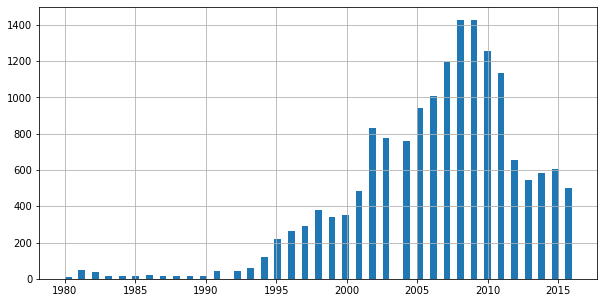

In [25]:
data['year_of_release'].hist(bins=75, range=(1980,2016), figsize=(10,5))
plt.show()

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь. С 95-года росли чипы видеоадаптеров в мощности, соответственно график релизов тоже рос. 2005-2010 год - золотой век видеоигр, потом все инветоры разбрелись по возникшим крупным AAA издателям которые, в свою очередь, начали пожирать друг друга. В то время как качество игр и, соответственно, время и стоимость их разработки увеличивалось - самих игр стало меньше.

Но еще один фактор, который не отображен на наших данных - это сильный рост моблиьного рынка, особенно в азиатских странах.

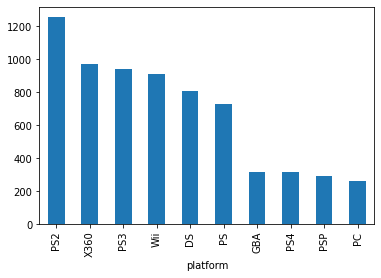

In [26]:
data.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

Здесь мы видим популярность платформ, возьмём 6 самых продаваемых за всё время и посмотрим на них под другим углом.

In [27]:
top_platfrom_sales = data.query('year_of_release != -1')\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_total', aggfunc = 'sum').fillna(0)
#создадим отдельную табличку, игнорируем заглушки, заполняем все пустые значения 0 для болле отчетливой визуализации

<AxesSubplot:xlabel='year_of_release'>

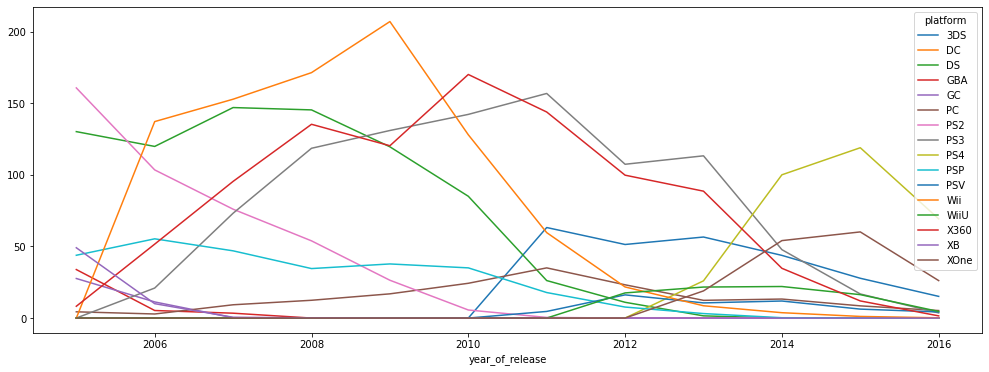

In [228]:
data.query('year_of_release >= 2005')\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_total', aggfunc = 'sum').fillna(0).plot(figsize=(17,6))

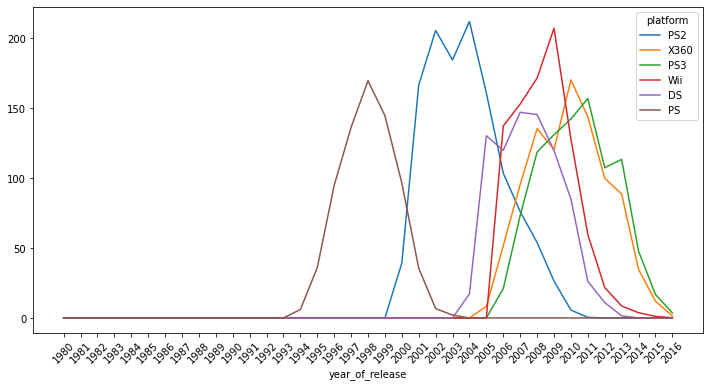

In [28]:
top_platfrom_sales = top_platfrom_sales[['PS2', 'X360','PS3','Wii', 'DS', 'PS']]
top_platfrom_sales.plot(xticks=top_platfrom_sales.index,figsize=(12,6))
plt.xticks(rotation = 45)
plt.show()

Заметно, что цикл появления новых и исчезновения старых платформ составляет примерно 12 лет. Таким образом, для прогнозирования подаж на следующий год нужно использовать данные за последние 5-ть лет: платформы, продажи которых растут в течение этого срока, являются наиболее перспективными (т.к. есть еще пара лет до пика продаж + впереди достаточно большой срок, когда продажи будут падать, но все еще будут приносить достаточно денег).

Давайте посмотрим данные за 2013-2016г, чтобы понять, какие платформы окажутся в лидерах.

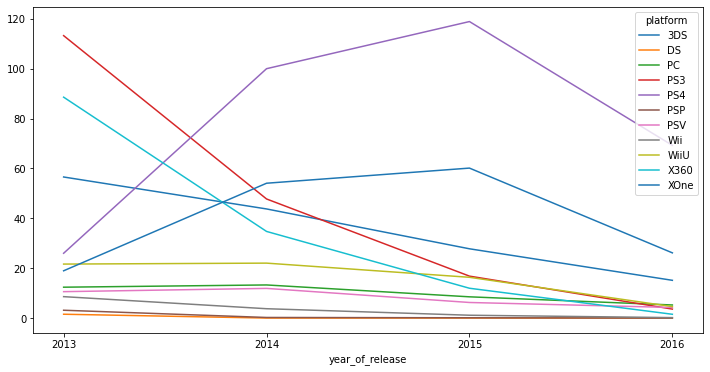

In [29]:
relevant_sales = data.query('year_of_release != -1 and year_of_release >= 2013')\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_total', aggfunc = 'sum').fillna(0)
relevant_sales.plot(xticks=relevant_sales.index,figsize=(12,6))
plt.show()

Итак, самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft. Какое-то время будут актуальны игры для платформ Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3. Остальные платформы уже упали в продажах и ждать второго дыхания в 2017 году не стоит. Конечно, на графике виден спад абсолютно всех продаж в 2016 году, но возможно это связано с тем, что просто нет полных данных за этот период.

Так же любопытно, что на примере Sony PlayStation 3 и Sony PlayStation (или Xbox One и Xbox 360) можно увидеть смену поколений, когда игры выпускаются как для старой платформы, так и для новой.

In [30]:
new_data = data.query('year_of_release != -1 and year_of_release >= 2013 and platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]')
new_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.00,-1.00,none,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.00,-1.00,none,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62


In [63]:
new_data.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.00,7.90,M,5.47


In [62]:
new_data.query('sales_total > 20')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05


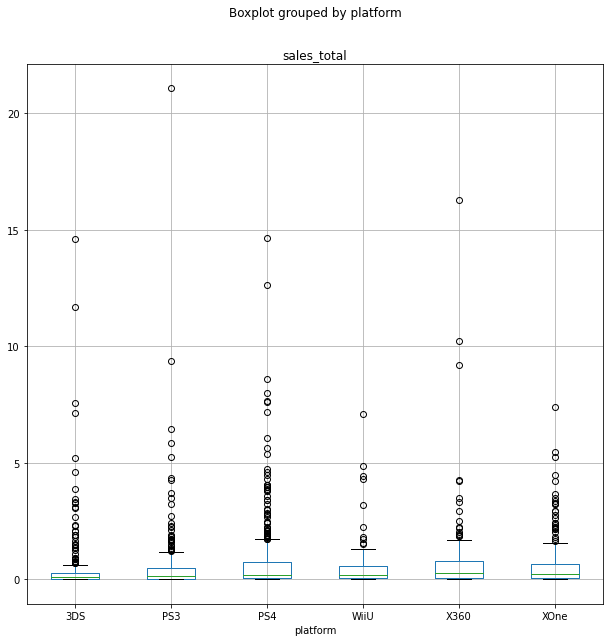

In [31]:
new_data.boxplot('sales_total', by='platform',figsize=(10,10))
plt.show()

Здесь мы видим, что почти все платформы имели свои бестселлеры, и немало. В особенности отличились PS3 и Xbox 360 с выходом GTAV. 

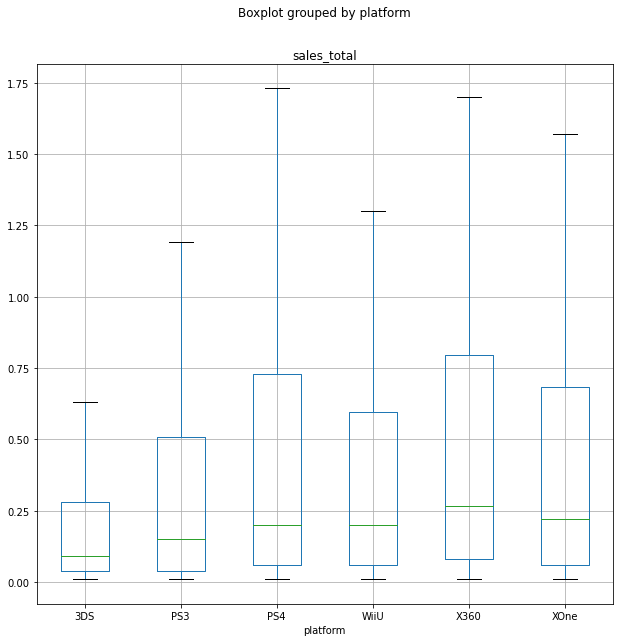

In [32]:
new_data.boxplot('sales_total', by='platform',figsize=(10,10), showfliers=False)
plt.show()

Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами. При этом везде есть небольшое количество бестселлеров, продажи которых могут многократно превышать обычные значения.

Рассмотрим одну из популярных платформ и влияние на продажи внутри неё отзывов пользователей и критиков. Самый подходящий вариант здесь, думаю, будет PS4.

In [33]:
new_data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
5954,Disney Infinity,3DS,2013,Action,0.17,0.10,0.00,0.02,-1.00,-1.00,none,0.29


In [34]:
new_data.query('platform == "PS4" and critic_score != -1 and user_score != -1')[['sales_total', 'critic_score', 'user_score']]

,sales_total,critic_score,user_score
42,12.62,97.00,8.30
77,8.58,82.00,4.30
92,7.66,83.00,5.70
94,7.60,85.00,5.00
105,7.17,87.00,6.50
...,...,...,...
16486,0.01,42.00,2.30
16499,0.01,70.00,6.80
16500,0.01,69.00,7.50
16526,0.01,61.00,7.90


In [35]:
score_corr_PS4 = new_data.query('platform == "PS4" and critic_score != -1 and user_score != -1')[['sales_total', 'critic_score', 'user_score']]
score_corr_PS4.head()

,sales_total,critic_score,user_score
42,12.62,97.00,8.30
77,8.58,82.00,4.30
92,7.66,83.00,5.70
94,7.60,85.00,5.00
105,7.17,87.00,6.50


In [36]:
score_corr_PS4.corr()

,sales_total,critic_score,user_score
sales_total,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


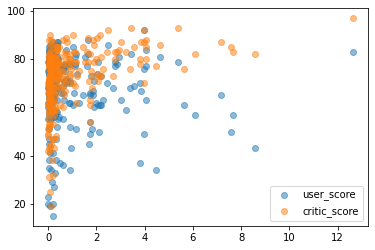

In [37]:
X = score_corr_PS4['sales_total']
Y1 = score_corr_PS4['user_score']
Y2 = score_corr_PS4['critic_score']

plt.scatter(X,Y1*10, alpha=0.5)
plt.scatter(X,Y2, alpha=0.5)
plt.legend(['user_score', 'critic_score'])
plt.show()

Прямой зависимости не наблюдается, хотя оценки критиков влияют на продажи чуть больше. Посмотрим на другие платформы.

In [38]:
score_corr_all = new_data.query('critic_score != -1 and user_score != -1')[['sales_total', 'critic_score', 'user_score']]

In [39]:
score_corr_all.corr()

,sales_total,critic_score,user_score
sales_total,1.00,0.36,0.01
critic_score,0.36,1.00,0.56
user_score,0.01,0.56,1.00


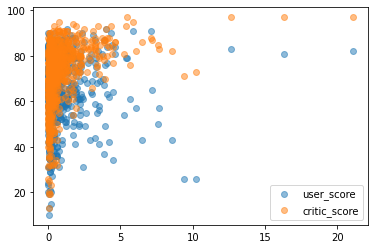

In [40]:
X = score_corr_all['sales_total']
Y1 = score_corr_all['user_score']
Y2 = score_corr_all['critic_score']

plt.scatter(X,Y1*10, alpha=0.5)
plt.scatter(X,Y2, alpha=0.5)
plt.legend(['user_score', 'critic_score'])
plt.show()

Если брать общий срез, то картина не меняется. Рассмотрим каждую платформу по отдельности.

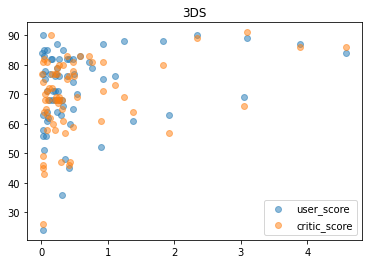

,sales_total,user_score,critic_score
sales_total,1.00,0.27,0.34
user_score,0.27,1.00,0.77
critic_score,0.34,0.77,1.00


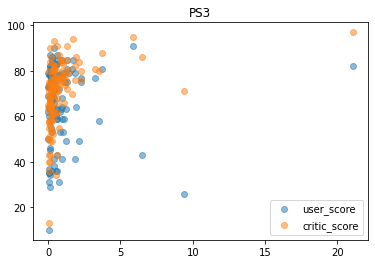

,sales_total,user_score,critic_score
sales_total,1.00,0.02,0.33
user_score,0.02,1.00,0.60
critic_score,0.33,0.60,1.00


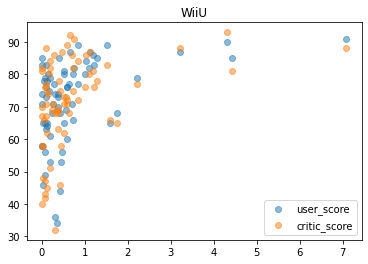

,sales_total,user_score,critic_score
sales_total,1.00,0.41,0.38
user_score,0.41,1.00,0.72
critic_score,0.38,0.72,1.00


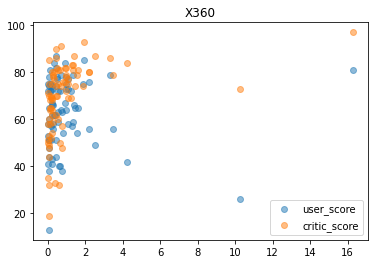

,sales_total,user_score,critic_score
sales_total,1.00,-0.01,0.35
user_score,-0.01,1.00,0.52
critic_score,0.35,0.52,1.00


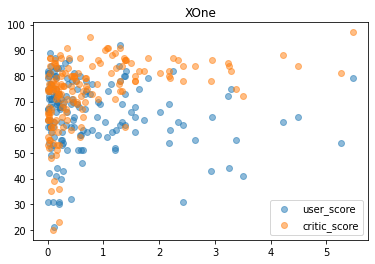

,sales_total,user_score,critic_score
sales_total,1.00,-0.09,0.41
user_score,-0.09,1.00,0.47
critic_score,0.41,0.47,1.00


In [41]:
platform_list = ['3DS', 'PS3','WiiU', 'X360', 'XOne']
#Простым циклом применим тот же метод ко всем остальным платформам.
for platform in platform_list:
    temp = new_data.query('critic_score != -1 and user_score != -1 and platform == @platform')[['sales_total','user_score', 'critic_score']]
    
    X = temp['sales_total']
    Y1 = temp['user_score']
    Y2 = temp['critic_score']

    plt.scatter(X,Y1*10, alpha=0.5)
    plt.scatter(X,Y2, alpha=0.5)
    plt.legend(['user_score', 'critic_score'])
    plt.title(platform)
    plt.show()   
    
    display(temp.corr())
    

Как мы видим на графиках для всех остальных платформ - корреляции так и не прибавилось. Для Wii U оценка пользователей имела большее значение, но в целом прямого влияния оценка критиков/пользователей на продажи не имеет.

#### Распределение игр по жанрам

In [42]:
new_data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
898,Destiny,X360,2014,Shooter,1.31,0.43,0.00,0.18,-1.00,4.70,T,1.92


In [43]:
new_data['genre'].value_counts()

Action          569
Role-Playing    189
Sports          175
Shooter         153
Misc            116
Adventure       113
Fighting         67
Racing           66
Platform         62
Simulation       36
Strategy         27
Puzzle           15
Name: genre, dtype: int64

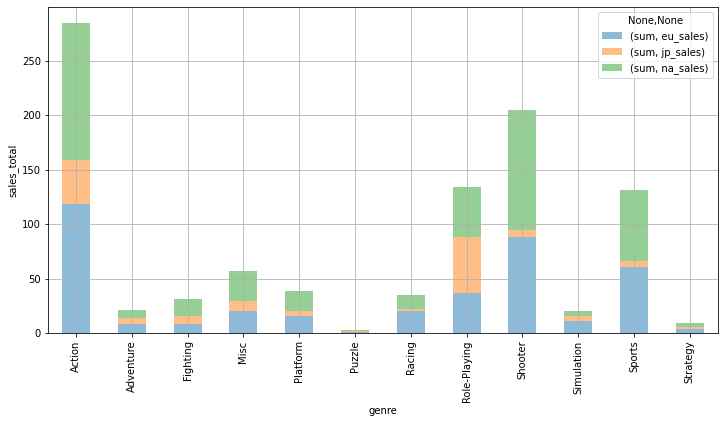

In [44]:
data.query('year_of_release != -1 and year_of_release >= 2013')\
.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = ['sum'])\
.plot(kind='bar', grid=True, stacked=True, figsize=(12,6), alpha=0.5)
plt.ylabel('sales_total')
plt.xlabel('genre')
plt.show()

Самыми продаваемыми жанрами в играх являются Action, Shooter и Role-Playing/Sports.

А вот самые низкие продажи у игр в жанрах Adventure, Strategy, Simulation и Puzzle.

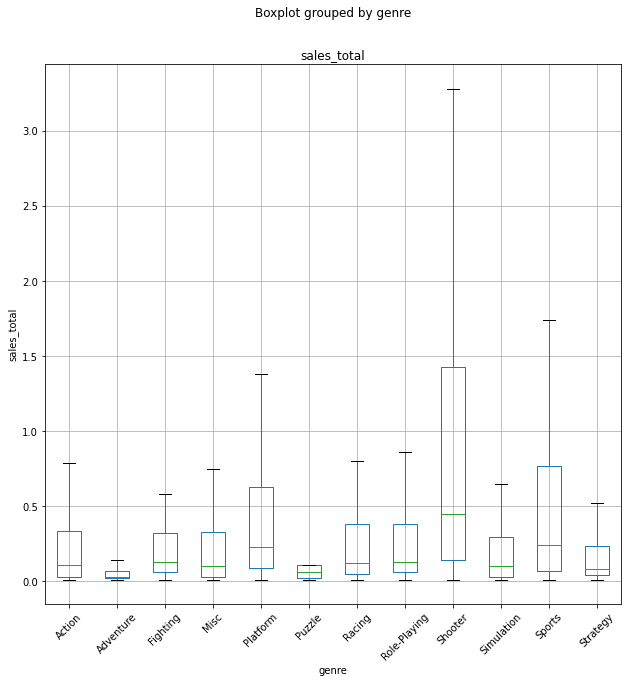

In [45]:
data.query('year_of_release != -1 and year_of_release >= 2013')\
.boxplot('sales_total', by='genre',figsize=(10,10), rot=45, showfliers=False)
plt.ylabel('sales_total')
plt.xlabel('genre')
plt.show()

Здесь мы видим, что у action большее число продаж, но у Shooter/Sports/Platform медиана выше.
Можно предположить, что Action увеличивает число продаж за счёт отдельных популярных игр, а Shooter в целом лучше продаётся, даже если хитовых игр меньше.

### 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Здесь я решил продолжить работу с выборкой после 2013 года для исследования актуальной информации.

#### Самые популярные платформы (топ-5)

In [46]:
new_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU'], dtype=object)

In [166]:
top_5_platform = data.query('year_of_release != -1 and year_of_release >= 2013').pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
platform_na = top_5_platform['na_sales'].sort_values(ascending=False).head(5)
platform_eu = top_5_platform['eu_sales'].sort_values(ascending=False).head(5)
platform_jp = top_5_platform['jp_sales'].sort_values(ascending=False).head(5)

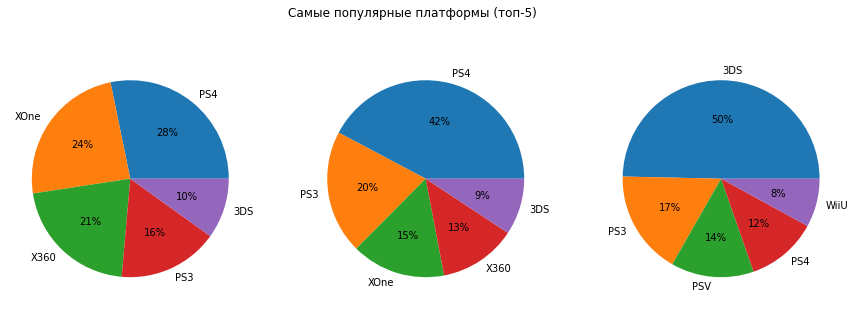

In [196]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Самые популярные платформы (топ-5)')
ax1.pie(platform_na, labels=platform_na.index, autopct='%.0F%%')
ax2.pie(platform_eu, labels=platform_eu.index, autopct='%.0F%%')
ax3.pie(platform_jp, labels=platform_jp.index, autopct='%.0F%%')
plt.show()

In [185]:
# platform_na.head(5).plot(kind='pie', subplots=True, figsize=(12,6), legend=False, autopct='%.0F%%')
# plt.title('North America')
# plt.show()
# platform_eu.head(5).plot(kind='pie', subplots=True, figsize=(12,6), legend=False, autopct='%.0F%%')
# plt.title('Europe')
# plt.show()
# platform_jp.head(5).plot(kind='pie', subplots=True, figsize=(12,6), legend=False, autopct='%.0F%%')
# plt.title('Japan')
# plt.show()

Здесь мы видим, что в период с 2013 по 2016 год Япония оказала очень большое влияние для Америку и Европу, в частности с выходом PS4, которая на тот момент сильно превзошла по популярности продукцию своего конкурента Microsoft. 

Nintendo в свою очередь уже давно захватила сердца западной аудитории ещё с выходом Mario. Можно с уверенностью сказать, что эта компания еще не один год будет занимать свою малую, но очень уверенную позицию на западном рынке.

Сами Японцы в свою очередь предпочитают поддерживать родную продукцию, что не удивительно, если смотреть насколько культурно изолирована сама страна. Продукция Nintendo гораздо более привлекательна Японцам, вполне возможно из-за того, 3DS является довольно мобильной платформой, что в принципе очень ценится на азиатском рынке.

#### Самые популярные жанры (топ-5)

In [198]:
top_5_genre = data.query('year_of_release != -1 and year_of_release >= 2013').pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
genre_na = top_5_genre['na_sales'].sort_values(ascending=False).head(5)
genre_eu = top_5_genre['eu_sales'].sort_values(ascending=False).head(5)
genre_jp = top_5_genre['jp_sales'].sort_values(ascending=False).head(5)

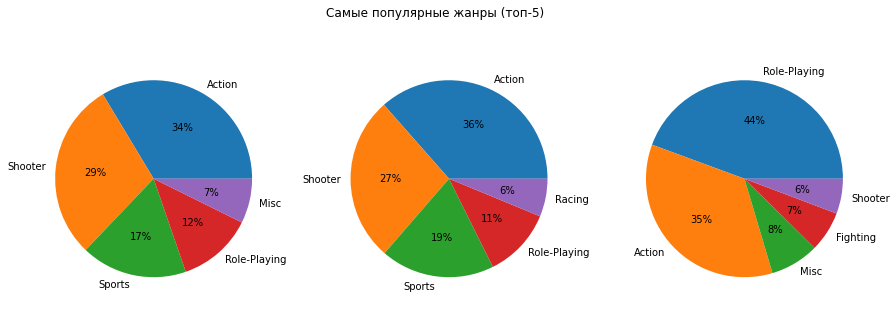

In [200]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Самые популярные жанры (топ-5)')
ax1.pie(genre_na, labels=genre_na.index, autopct='%.0F%%')
ax2.pie(genre_eu, labels=genre_eu.index, autopct='%.0F%%')
ax3.pie(genre_jp, labels=genre_jp.index, autopct='%.0F%%')
plt.show()

In [184]:
# genre_na.head(5).plot(kind='pie', subplots=True, figsize=(6,6), legend=True, autopct='%.0F%%', labeldistance=None)
# plt.title('North America')
# plt.show()
# genre_eu.head(5).plot(kind='pie', subplots=True, figsize=(6,6), legend=True, autopct='%.0F%%', labeldistance=None)
# plt.title('Europe')
# plt.show()
# genre_jp.head(5).plot(kind='pie', subplots=True, figsize=(6,6), legend=True, autopct='%.0F%%', labeldistance=None)
# plt.title('Japan')
# plt.show()

Здесь мы видим, что Америку и Европу привлекают более динамические жанры. В обоих регионах Action и Shooter занимают лидирующие позиции, со спортивными играми слегка позади. И лишь 11-12% игроков предпочитают исследовать альтернативные миры жанра RPG.

В Японии же на тот момент (да и до сих пор) преобладал популярностью жанр JRPG (Japanese Roleplaying Game), который с уверенностью забирает 44% внимания японских геймеров, с жанром Action на втором месте, практически не интересуясь остальными жанрами.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [51]:
data['rating'].unique()

array(['E', 'none', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

`EC` — Early Childhood «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

`E` — Everyone «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально K-A ("Kids to Adults");

`E10+` — Everyone 10+ «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

`T` — Teen «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

`M` — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

`AO` — Adults Only Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

`RP` — Rating Pending Рейтинг ожидается.

In [201]:
top_5_rating = data.query('year_of_release != -1 and year_of_release >= 2013').pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
rating_na = top_5_rating['na_sales'].sort_values(ascending=False).head(5)
rating_eu = top_5_rating['eu_sales'].sort_values(ascending=False).head(5)
rating_jp = top_5_rating['jp_sales'].sort_values(ascending=False).head(5)

In [53]:
data.query('rating == "none"').sample(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
10556,Penguin no Mondai: The World,DS,2010,Adventure,0.00,0.00,0.10,0.00,-1.00,-1.00,none,0.10
14755,Yahari Game Demo Ore no Seishun Love-Kome wa M...,PSV,2016,Adventure,0.00,0.00,0.03,0.00,-1.00,-1.00,none,0.03
9406,Tales of the Heroes: Twin Brave,PSP,2012,Role-Playing,0.00,0.00,0.13,0.00,-1.00,-1.00,none,0.13
8473,Hamster Heroes,Wii,2008,Puzzle,0.16,0.00,0.00,0.00,-1.00,-1.00,none,0.16
11167,Sengoku Basara 4: Sumeragi,PS3,2015,Action,0.00,0.00,0.09,0.00,-1.00,-1.00,none,0.09
9088,Shonen Jump's Shaman King: Master of Spirits,GBA,2004,Role-Playing,0.10,0.04,0.00,0.00,-1.00,-1.00,none,0.14
16387,Durarara!! Relay,PSV,2015,Action,0.00,0.00,0.01,0.00,-1.00,-1.00,none,0.01
14523,Great Edo Blacksmith,PSV,2014,Adventure,0.00,0.00,0.03,0.00,-1.00,-1.00,none,0.03
10194,Shin Sangoku Musou 6 Special,PSP,2011,Action,0.00,0.00,0.11,0.00,-1.00,-1.00,none,0.11
8248,The Idolm@ster: Shiny Festa - Honey Sound / Fu...,PSP,2012,Action,0.00,0.00,0.17,0.00,-1.00,-1.00,none,0.17


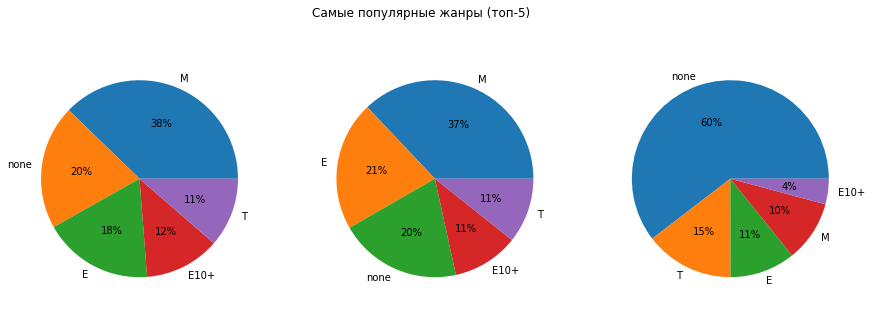

In [202]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Самые популярные жанры (топ-5)')
ax1.pie(rating_na, labels=rating_na.index, autopct='%.0F%%')
ax2.pie(rating_eu, labels=rating_eu.index, autopct='%.0F%%')
ax3.pie(rating_jp, labels=rating_jp.index, autopct='%.0F%%')
plt.show()

In [203]:
# rating_na.head(5).plot(kind='pie', subplots=True, figsize=(12,6), legend=False, autopct='%.0F%%')
# plt.title('North America')
# plt.show()
# rating_eu.head(5).plot(kind='pie', subplots=True, figsize=(12,6), legend=False, autopct='%.0F%%')
# plt.title('Europe')
# plt.show()
# rating_jp.head(5).plot(kind='pie', subplots=True, figsize=(12,6), legend=False, autopct='%.0F%%')
# plt.title('Japan')
# plt.show()

Здесь мы видим, что в Америке и Европе преобладает рейтинг М. Это связано с тем, что практически все экшн блокбастеры (такие как Assassin's Creed, Call of Duty, Grand Theft Auto) имеют рейтинг М. 

Насчёт Японии достоверных выводов сделать невозможно, так Япония играет в свои игры со своей рейтинговой системой.

Вообще ESRB - это исключительно Американская программа. У Японии есть своё (CERO), а у Европы своё (PEGI). 

Несмотря на некоторую недостоверность данных, я всё же скажу, что среднестатистический пользователь на рейтинг не смотрит. Родители очень часто не контроллируют то, во что их дети играют. А подростки и вовсе уже во всю покупают M игры.

Всё же для издателя - это довольно важный вопрос, так как подобная процедура имеет правовые последствия непосредственно для самого издателя или третьего лица, продающего игру. Поэтому издатель будет стараться насколько сможет держать игру в 12+ или 16+ категории. 

Но как мы видим в нашем случае: клиент хочет - клиент получит.

### 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

In [213]:
relevant_data = data.query('year_of_release >= 2013') #определяем срез, с которым мы хотим работать

### Гипотезы:
- H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [214]:
alpha = 0.05

In [215]:
xbox_one = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['user_score'] > 0)]['user_score']
pc = relevant_data[(relevant_data['platform'] == 'PC') & (relevant_data['user_score'] > 0)]['user_score']

In [216]:
results = st.ttest_ind(xbox_one, pc)

In [217]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


### Гипотезы:
- H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [218]:
action = relevant_data[(relevant_data['genre'] == 'Action') & (relevant_data['user_score'] > 0)]['user_score']
sports = relevant_data[(relevant_data['genre'] == 'Sports') & (relevant_data['user_score'] > 0)]['user_score']

In [219]:
results = st.ttest_ind(action, sports)

In [220]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


### 6. Напишите общий вывод

В ходе исследования мы сделали следующие выводы:

Для успешных продаж, ритейлеру нужно учитывать несколько факторов:

- актуальность игровой платформы сильно влияет на интерес пользователей. 

    - Средняя жизнь платформы составляет от `8 до 12 лет`. Очень хорошо это было видно на примере `Sony` vs `Microsoft`. На протяжении всего периода эти две компании воевали за внимание пользователей, и это хорошо отражалось на продажах. 

        - В период с 2013 по 2016 год самыми актуальными платформами являются `PS4` и `Xbox One`. Тут можно быть уверенными в том, что они будут продаваться еще не один год. В этот период Япония взорвала Запад с выпуском `PS4`. Эта платформа принесла наибольшую прибыль в последние 2-3 года, но тут тоже поспешных выводов делать не стоит - `Xbox One` остается вполне конкурентноспособной консолью.
        - А после можно быть уверенным в том, что конкуренция между этими команиями не оставит вас без новой консоли. 
        - Еще следует учесть, что у `Microsoft` присутствует система 'backwards compatibility' позволяющая на новых консолях играть в старые игры. Поэтому даже игры на `Xbox 360` будут пользоваться спросом какое-то время.
    
    - Что касается темной лошадки Nintendo - их платформы обычно живут немного дольше, потому что они производят свой немного нишевый, но очень уникальный продукт. Это касается игр и платформ. Самая популярная платформа на которой стоит заострить внимание - это Nintendo 3DS.


- Но актуальность платформы - это ещё далеко не последний фактор. Мы выяснили, что в большинстве платформы вывозят на бестселлерах. Так что стоит обратить внимание на конкретных издателей и разработчиков (например: Rockstar, Activision, Ubisoft), а также следить за наличием консольных эксклюзивов. Как показывает практика - эксклюзивы играют большую роль в продаже консоли.


- Несмотря на выявленную малозначимость влияния оценок на продажи игры, всё таки стоит смотреть за оценками критиков - это поможет выбрать более успешный продукт. Но всё таки большая часть продаж приходится на усилия маркетологов.


- Стоит обратить внимание и на жанры. Стоит обратить внимание на такие жанры игр как `Action/Shooter/Role-playing/Sports`. `Action` в разы превосходит по выручке. Здесь важно понимать, что большая часть из перечисленных жанров приносит стабильную прибыль, а вот с `Action` будьте осторожны - этот жанр вывозит на отдельных очень популярных случаях. Не поддавайтесь на искушение забить все полки именно этим жанром.


- Тут еще важно знать предпочтения самих пользователей. 

    - В отношении платформ мы видим, что PS4 и Xbox One лидируют на обоих `Американском` и `Европейском` рынках.
    - Предпочтения в жанре практически одинаковы в обоих регионах. В лидерах - `Action/Shooter/Sports`.
    - Что касается `Японии` - тут пользователи предпочитают родной продукт. Nintendo 3DS здесь оставляет позади все остальные платформы, при этом в топ-5 нет ни одной западной платформы. А любовь японцев к `JRPG` перебивает интерес к остальным жанрам. Выделить еще можно разве что `Action`. 
    
- Что касается рейтинга, в целом влияние на интерес пользователей это оказывает маловажное. Все и так играют в 17+ игры. Стоит так же заметить, что рейтинга `ESRB` недостаточно для оценки продукта, если мы говорим о регионах кроме Америки. Для Европы следует учитывать рейтинг `PEGI`, а для Японии - `CERO`.

Так же, мы проверили две гипотезы, заявленные в самом начале исследования. В результате этого:

- Гипотеза о различии средних значений пользовательских оценок игр двух жанров Action и Sports не была отвергнута.

- Гипотеза о идентичности средних значений пользовательских оценок игр двух платформ PC и Xbox One не была отвергнута.

В случае с жанрами - тут всё понятно, Экшн и Спорт - совершенно разные вещи и подразумевают разную аудиторию.

В случае с платформами - тут может играть роль то, что эти две платформы очень плотно сопряжены в лице Microsoft. В то время как Sony старается как можно больше удержать на своей платформе, игры выходящие на Xbox - как правило сразу выходят на ПК. Одинковая аудитория - одинаковые оценки. В прочем неудивительно, Microsoft перед тем как выпустить Xbox, выпустила сначала Windows и глубоко заинтересована в взаимодействии между ПК и Xbox платформами.


В ходе исследования мы выяснили, что золотой век видеоигр уже позади. Как только в сферу игр пришли большие деньги, разработчики и издатели начали более активно гнаться за качеством и технологиями. Стали появляться AAA компании, игры делать стало дороже и стало занимать больше времени. Инди игры ушли в тень AAA проектов. Маленькие компании - в желудок большим. Итог - за тот же промежуток времени стало выходить меньше игр, а меньше игр - меньше прибыли на известных нам платформах.

В тоже время начал активно развиваться мобильный рынок, который пока что (2016 год) ориентируется на азиатскую сферу. Вы можете этого не замечать, но большие игровые компании, такие как Activision уже вовсю пашет в эту сторону. Activision Blizzard помимо основных дочерних компаний Activision и Blizzard также имеют компанию King, которую даже в название не поставили. Так вот King занимается исключительно мобильными играми и занимает чуть ли не лидирующую позицию в прибыли Activision Blizzard. 

Исходя из этого можно предположить, что прибыли не стало меньше, но её распределение сильно изменилось. Я бы посоветовал исследовать данные по мобильному рынку для полной картины.